# lab07-2 code

In [3]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu' #gpu사용 못하면 cpu로

random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [5]:
#hyper parameter
training_epochs = 15
batch_size = 100

In [6]:
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True, #훈련데이터
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False, #테스트데이터
                         transform=transforms.ToTensor(),
                         download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz to MNIST_data/MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST_data/MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw



In [7]:
data_loader = torch.utils.data.DataLoader(dataset=mnist_train, #흔련데이터 로드
                                          batch_size=batch_size, #배치 100
                                          shuffle=True, #epoch마다 배치셔플
                                          drop_last=True) #나머지(마지막) 버림

In [8]:
linear = torch.nn.Linear(784, 10, bias=True).to(device) #28*28 -> 10(0~9)label
#device = 'cuda'

In [9]:
criterion = torch.nn.CrossEntropyLoss().to(device)    # softmax포함.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

## training

In [10]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        
        X = X.view(-1, 28 * 28).to(device) #batch가 100이므로 X -> (100,784)텐서
        Y = Y.to(device) #label = 0~9 integer

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.535150647
Epoch: 0002 cost = 0.359577745
Epoch: 0003 cost = 0.331264287
Epoch: 0004 cost = 0.316404670
Epoch: 0005 cost = 0.307106972
Epoch: 0006 cost = 0.300456554
Epoch: 0007 cost = 0.294933438
Epoch: 0008 cost = 0.290956199
Epoch: 0009 cost = 0.287074089
Epoch: 0010 cost = 0.284515619
Epoch: 0011 cost = 0.281914085
Epoch: 0012 cost = 0.279526860
Epoch: 0013 cost = 0.277636588
Epoch: 0014 cost = 0.275874794
Epoch: 0015 cost = 0.274422765
Learning finished


## test

Accuracy: 0.8883000016212463
Label:  1
Prediction:  8


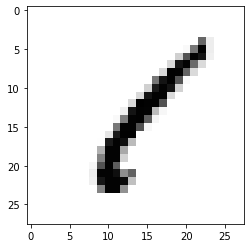

In [57]:
with torch.no_grad(): #torch.no_grad() -> gradient 계산을 하지 않음
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item()) #정확도

    #테스트 데이터 무작위 하나랑 비교
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item()) #실제
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item()) #예측값

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest') #선택한 데이터
    plt.show()